# load iris dataset

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# target = function of feature names

### (setosa, versicolor, viriginica) = f(sepal length, sepal width, petal length, petal width)

$y = f(X)$

$y \in [0,1,2]$

$X \in {\rm I\!R}^4 $

In [6]:
X = iris.data
y = iris.target

In [7]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
%notebook inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal width (cm)')

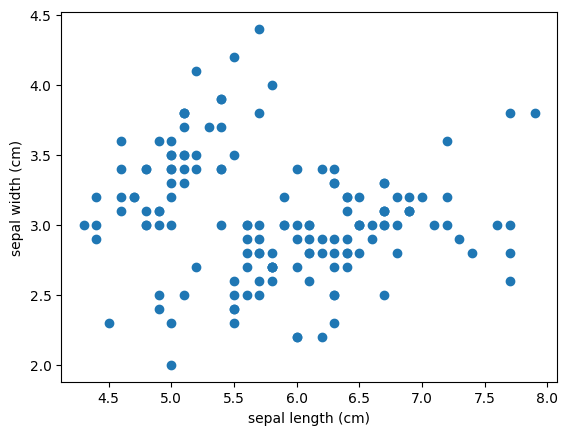

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


Text(0, 0.5, 'sepal width (cm)')

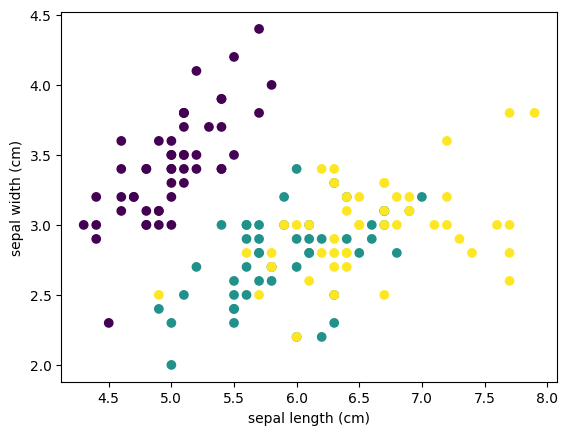

In [11]:

plot = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())


# for the time being let's consider only two features

# target = function of feature names

### (setosa, versicolor, viriginica) = f(sepal length, sepal width)

$y = f(X)$

$y \in [0,1,2]$

$X \in {\rm I\!R}^2 $


In [12]:
feature1 = iris.data[:,0]*iris.data[:,1]
feature2 = iris.data[:,2]*iris.data[:,3]

feature1 = feature1.reshape(-1, 1)
feature2 = feature2.reshape(-1, 1)

combined_features = np.concatenate((feature1, feature2), axis=1)

print(combined_features.shape)

X = combined_features # only selecting the new features
y = iris.target

(150, 2)


### we are going to split the data and keep some of the data seperate for testing the model

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

# import support vector machine model and train it

In [14]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [15]:
preds = clf.predict(X_test)
print(preds)

[1 1 1 1 0 2 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [16]:
print('actual iris species')
print(y_test)

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.95
